In [2]:
import pandas as pd
import msc_project.utils.plot_utils as pu
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [3]:
PATH_TEST23 = '/scratch/msc24h18/msc_project/results/test23/'
PATH_TEST31 = '/scratch/msc24h18/msc_project/results/test31/'
PATH_TEST32 = '/scratch/msc24h18/msc_project/results/test32/'
PATH_TEST42 = '/scratch/msc24h18/msc_project/results/test42/'
PATH_TEST46 = '/scratch/msc24h18/msc_project/results/test46/'
PATH_TEST50 = '/scratch/msc24h18/msc_project/results/test50/'
PATH_TEST52 = '/scratch/msc24h18/msc_project/results/test52/'
PATH_TEST55 = '/scratch/msc24h18/msc_project/results/test55/'
PATH_TEST56 = '/scratch/msc24h18/msc_project/results/test56/'
PATH_TEST57 = '/scratch/msc24h18/msc_project/results/test57/'
PATH_TEST57b = '/scratch/msc24h18/msc_project/results/test57b/'
PATH_TEST59 = '/scratch/msc24h18/msc_project/results/test59/'
PATH_FP = '/scratch/msc24h18/msc_project/results/floating_point/'

FIGURES_PATH = '/scratch/msc24h18/msc_project/results/report_figures/'

In [4]:
# class to simulate argparse argument object. will return None for any attribute that is not set
class Args:
    def __init__(self):
        self.aspect = 'auto'
        self.scale = 'linear'

    def __getattr__(self, name):
        return None

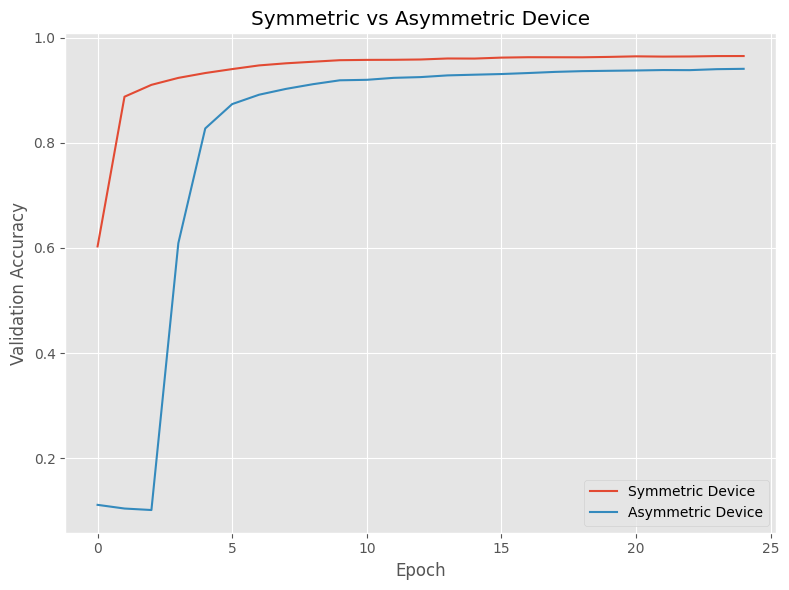

In [5]:
symmetric_data = pd.read_csv(
    PATH_TEST23 + 'aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(1)]20240919110516/metrics.csv')
asymmetric_data = pd.read_csv(
    PATH_TEST23 + 'aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(3)]20240919111350/metrics.csv')


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(symmetric_data['epoch'], symmetric_data['val_acc'], label="Symmetric Device")
ax.plot(asymmetric_data['epoch'], asymmetric_data['val_acc'], label="Asymmetric Device")
ax.set(xlabel='Epoch', ylabel='Validation Accuracy', title='Symmetric vs Asymmetric Device')
ax.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'symmetric_vs_asymmetric_device.png')
plt.show()

/scratch/msc24h18/msc_project/src/msc_project/utils/plot_utils.py:498: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  metadata = metadata.apply(pd.to_numeric, errors='ignore')
/scratch/msc24h18/msc_project/src/msc_project/utils/plot_utils.py:498: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  metadata = metadata.apply(pd.to_numeric, errors='ignore')


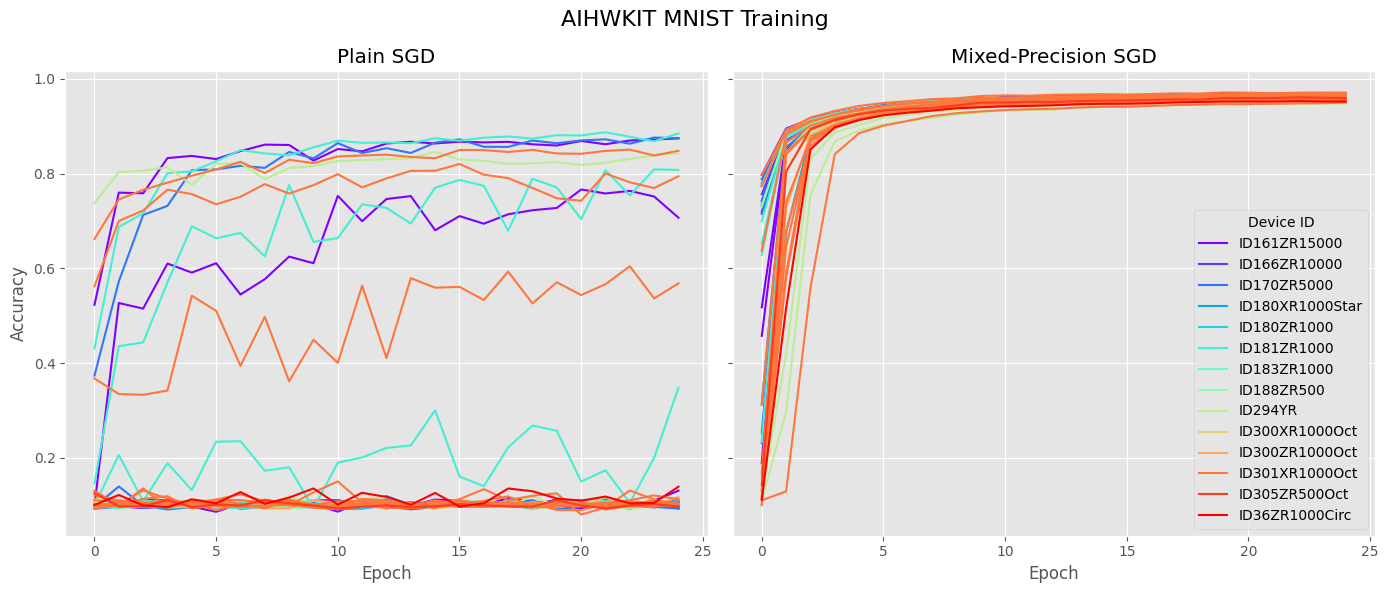

In [6]:
args = Args()
args.input = PATH_TEST50 + 'aihwkit'
args.x = 'epoch'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
pu._plot_pytorch(fig, axs[0], args)
args.input = PATH_TEST52 + '/aihwkit'
pu._plot_pytorch(fig, axs[1], args)

axs[0].legend_ = None

axs[0].set(title="Plain SGD", xlabel="Epoch", ylabel="Accuracy")
axs[1].set(title="Mixed-Precision SGD", xlabel="Epoch")
fig.suptitle("AIHWKIT MNIST Training", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_mnist_training.png')
plt.show()

Filtering data based on dw_min_std = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]
Filtering data based on dw_min_std = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]


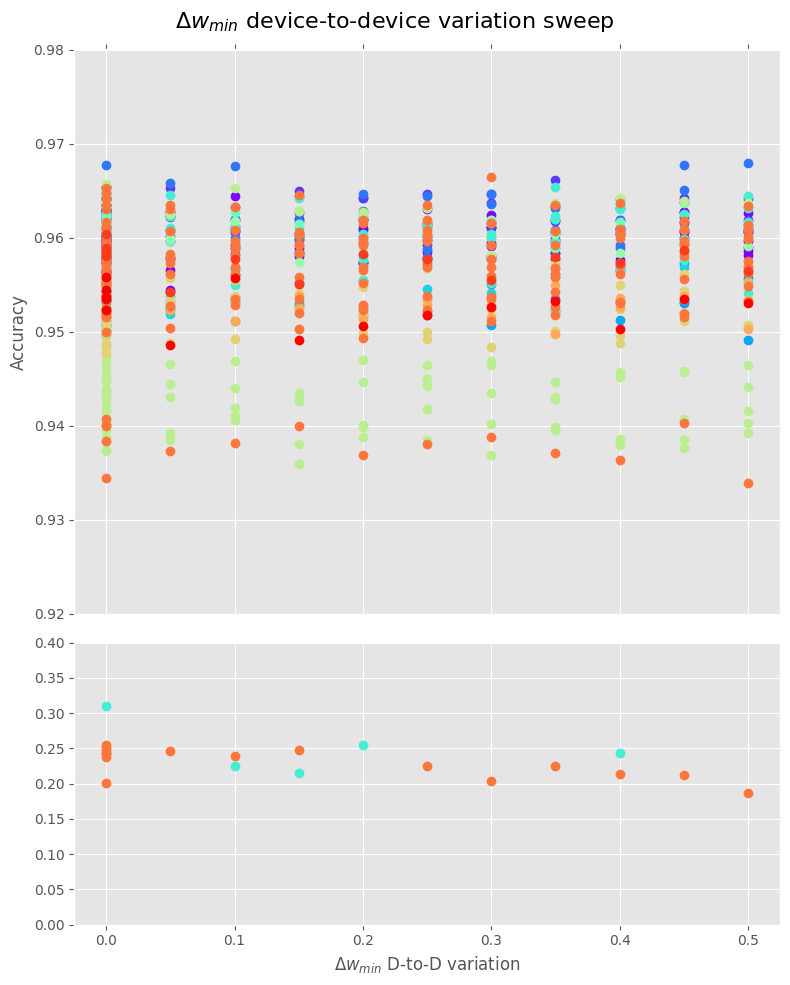

Filtering data based on dw_min_dtod = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]
Filtering data based on dw_min_dtod = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]


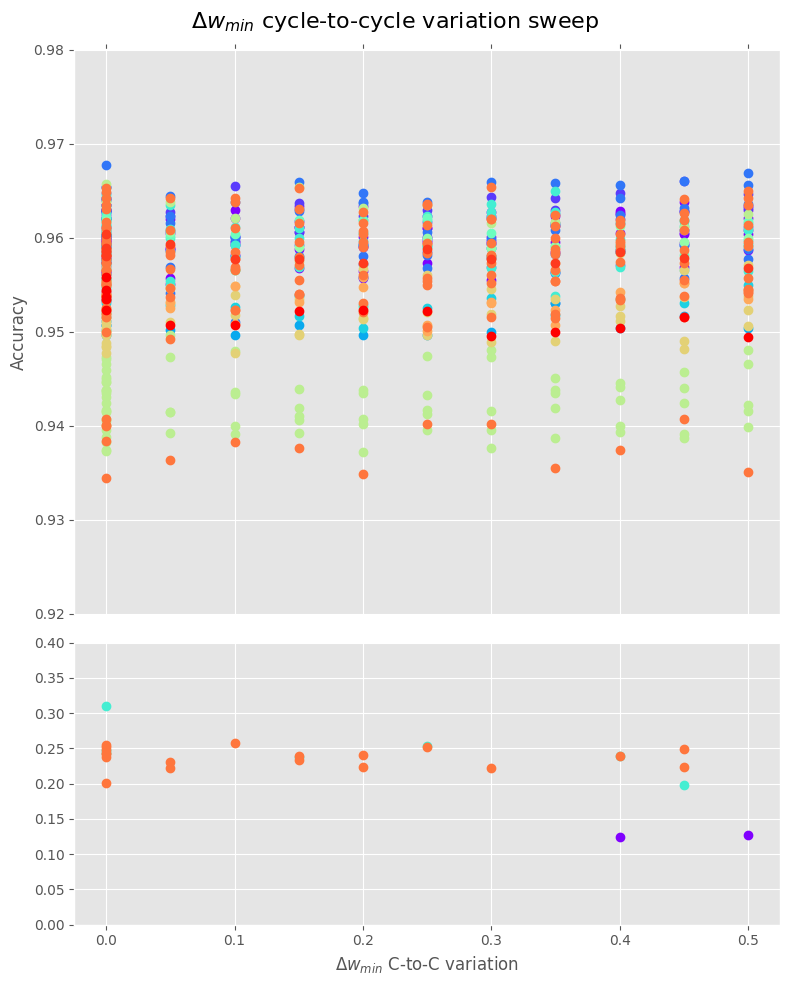

Filtering data based on dw_min_dtod = [0]
Filtering data based on dw_min_std = [0]
Filtering data based on w_min_dtod = [0]
Filtering data based on dw_min_dtod = [0]
Filtering data based on dw_min_std = [0]
Filtering data based on w_min_dtod = [0]


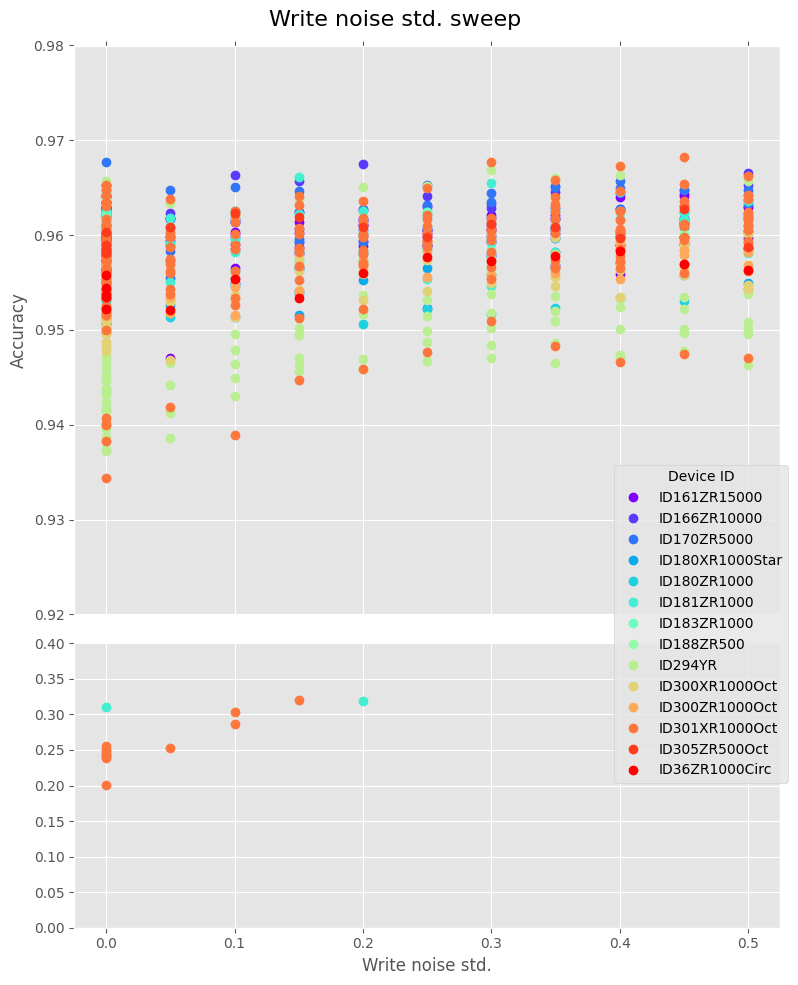

In [7]:
# dw_min_dtod #######################################################

args = Args()
args.input = PATH_TEST31 + 'all.csv'
args.x = 'dw_min_dtod'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"
args.filter = [["dw_min_std", 0], ["write_noise_std", 0], ["w_min_dtod", 0]]

fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0.05)

pu._plot_summary(fig, axs[0], args)
pu._plot_summary(fig, axs[1], args)

axs[0].legend_ = None
axs[1].legend_ = None

axs[0].set(ylabel="Accuracy", ylim=(0.92, 0.98))
axs[1].set(xlabel="$\Delta w_{{min}}$ D-to-D variation", ylim=(0, 0.4))

# hide the spines between ax and ax2
axs[0].spines.bottom.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[0].xaxis.tick_top()
axs[0].tick_params(labeltop=False)  # don't put tick labels at the top
axs[1].xaxis.tick_bottom()

fig.suptitle("$\Delta w_{{min}}$ device-to-device variation sweep", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_dw_min_dtod_sweep.png')
plt.show()


# dw_min_std ##########################################################

args.input = PATH_TEST31 + 'all.csv'
args.x = 'dw_min_std'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"
args.filter = [["dw_min_dtod", 0], ["write_noise_std", 0], ["w_min_dtod", 0]]

fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0.05)

pu._plot_summary(fig, axs[0], args)
pu._plot_summary(fig, axs[1], args)

axs[0].legend_ = None
axs[1].legend_ = None

axs[0].set(ylabel="Accuracy", ylim=(0.92, 0.98))
axs[1].set(xlabel="$\Delta w_{{min}}$ C-to-C variation", ylim=(0, 0.4))

# hide the spines between ax and ax2
axs[0].spines.bottom.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[0].xaxis.tick_top()
axs[0].tick_params(labeltop=False)  # don't put tick labels at the top
axs[1].xaxis.tick_bottom()

fig.suptitle("$\Delta w_{{min}}$ cycle-to-cycle variation sweep", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_dw_min_std_sweep.png')
plt.show()


# write_noise_std #######################################################

args.input = PATH_TEST31 + 'all.csv'
args.x = 'write_noise_std'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"
args.filter = [["dw_min_dtod", 0], ["dw_min_std", 0], ["w_min_dtod", 0]]

fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0.05)

pu._plot_summary(fig, axs[0], args)
pu._plot_summary(fig, axs[1], args)

# axs[0].legend(loc='lower right', bbox_to_anchor=(1, 0), title="Device ID")
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='lower right', bbox_to_anchor=(1, 0.2), title="Device ID")

axs[1].legend_ = None
axs[0].legend_ = None

axs[0].set(ylabel="Accuracy", ylim=(0.92, 0.98))
axs[1].set(xlabel="Write noise std.", ylim=(0, 0.4))

# hide the spines between ax and ax2
axs[0].spines.bottom.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[0].xaxis.tick_top()
axs[0].tick_params(labeltop=False)  # don't put tick labels at the top
axs[1].xaxis.tick_bottom()

fig.suptitle("Write noise std. sweep", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_write_noise_std_sweep.png')
plt.show()

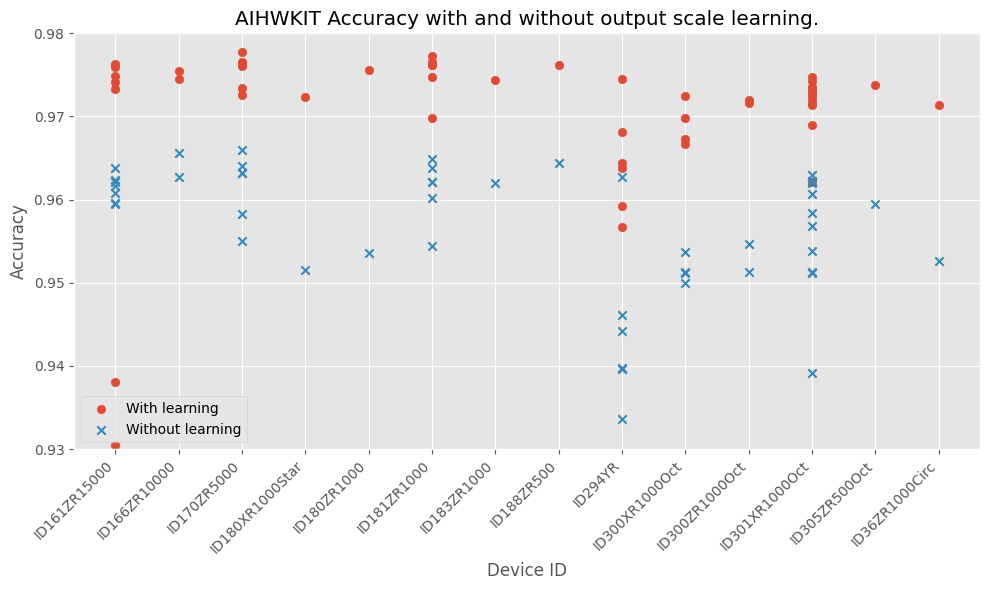

In [8]:
# learn out scaling comparison

def plot_los_comparison(csv_path_learn, csv_path_no_learn, savefig, **kwargs):
    data_learn = pd.read_csv(csv_path_learn)
    data_nolearn = pd.read_csv(csv_path_no_learn)

    data_learn.sort_values(by=['device_id', 'test_time'], inplace=True)
    data_nolearn.sort_values(by=['device_id', 'test_time'], inplace=True)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(data_learn['device_id'], data_learn['val_acc'], label='With learning', marker='o')
    ax.scatter(data_nolearn['device_id'], data_nolearn['val_acc'], label='Without learning', marker='x')

    ax.set_xticks(data_learn['device_id'].unique())
    ax.set_xticklabels(data_learn['device_id'].unique(), rotation=45, ha='right')

    ax.set(**kwargs)
    ax.legend()

    plt.tight_layout()
    plt.savefig(savefig)
    plt.show()


DATA_PATH_LEARN = os.path.join(PATH_TEST32, 'learn_out_scaling_wnstd_0.csv')
DATA_PATH_NOLEARN = os.path.join(PATH_TEST32, 'no_out_scaling_wnstd_0.csv')

plot_los_comparison(DATA_PATH_LEARN, DATA_PATH_NOLEARN,
                    savefig=FIGURES_PATH + 'aihwkit_learn_out_scaling.png',
                    title="AIHWKIT Accuracy with and without output scale learning.", xlabel='Device ID', ylabel='Accuracy', ylim=(0.93, 0.98))

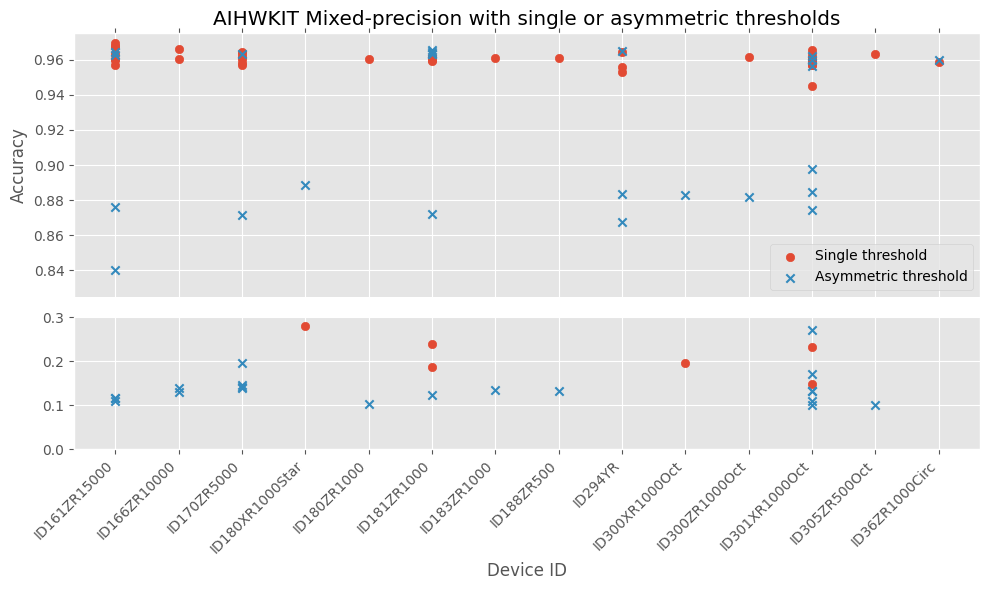

In [9]:
# multi-threshold mp comparison

def plot_mp_comparison(csv_path_symmetric, csv_path_asymmetric, savefig, **kwargs):
    data_symmetric = pd.read_csv(csv_path_symmetric)
    data_asymmetric = pd.read_csv(csv_path_asymmetric)

    data_symmetric.sort_values(by=['device_id', 'test_time'], inplace=True)
    data_asymmetric.sort_values(by=['device_id', 'test_time'], inplace=True)

    fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
    fig.subplots_adjust(hspace=0.05)

    axs[0].scatter(data_symmetric['device_id'], data_symmetric['val_acc'], label='Single threshold', marker='o')
    axs[0].scatter(data_asymmetric['device_id'], data_asymmetric['val_acc'], label='Asymmetric threshold', marker='x')
    axs[1].scatter(data_symmetric['device_id'], data_symmetric['val_acc'], label='Single threshold', marker='o')
    axs[1].scatter(data_asymmetric['device_id'], data_asymmetric['val_acc'], label='Asymmetric threshold', marker='x')

    axs[0].set_xticks(data_symmetric['device_id'].unique())
    axs[1].set_xticklabels(data_symmetric['device_id'].unique(), rotation=45, ha='right')

    axs[0].set(ylim=(0.825, 0.975), **kwargs)
    axs[0].set(xlabel='')
    axs[1].set(ylim=(0, 0.3), **kwargs)
    axs[1].set(title='', ylabel='')

    # hide the spines between ax and ax2
    axs[0].spines.bottom.set_visible(False)
    axs[1].spines.top.set_visible(False)
    axs[0].xaxis.tick_top()
    axs[0].tick_params(labeltop=False)  # don't put tick labels at the top
    axs[1].xaxis.tick_bottom()

    axs[0].legend()

    plt.tight_layout()
    plt.savefig(savefig)
    plt.show()


DATA_PATH_SYMMETRIC = PATH_TEST46 + 'symmetric.csv'
DATA_PATH_ASYMMETRIC = PATH_TEST46 + 'asymmetric.csv'

plot_mp_comparison(DATA_PATH_SYMMETRIC, DATA_PATH_ASYMMETRIC, FIGURES_PATH + "aihwkit_asymmetric_mp.png",
                   title="AIHWKIT Mixed-precision with single or asymmetric thresholds", xlabel='Device ID', ylabel='Accuracy')

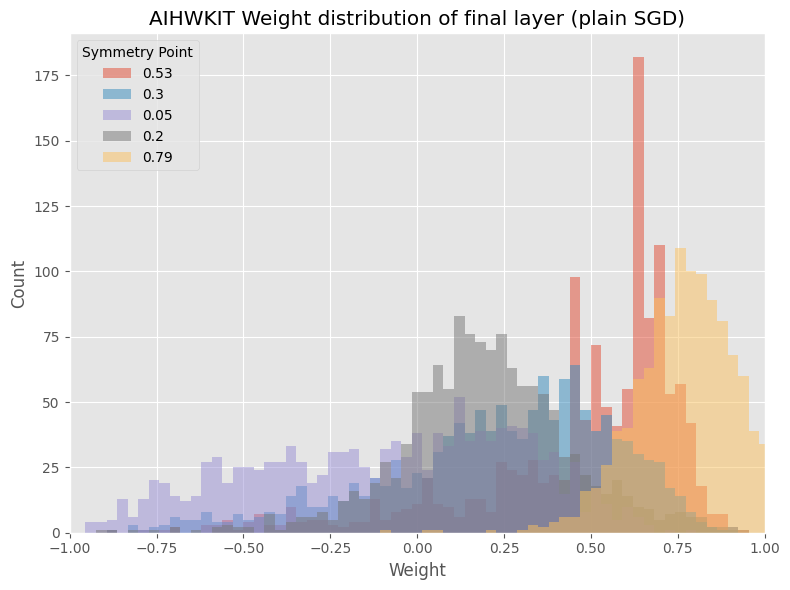

In [10]:
import pickle
import msc_project.utils.data_utils as du
import msc_project.utils.plot_utils as pu
import torch
summary_files = du.get_summary_files(PATH_TEST50)
weights_files = du.get_files(PATH_TEST50, 'pkl', 'weights', 'analog')
summaries = [du.read_summary_file(f)[0] for f in summary_files]
weights = [pickle.load(open(f, 'rb')) for f in weights_files]
# first layer is split into two (256,392) layers, so combine them into one (256,784)
for w in weights:
    for w_i in w:
        t1 = w_i['0.analog_module.array.0.0'][0]
        t2 = w_i['0.analog_module.array.1.0'][0]
        t3 = torch.cat([t1, t2], dim=1)
        new_weight = (t3, None)
        w_i.pop('0.analog_module.array.0.0', None)
        w_i.pop('0.analog_module.array.1.0', None)
        w_i['0.analog_module'] = new_weight
        w_i.move_to_end('0.analog_module', last=False)

df = pd.read_csv(PATH_TEST50+'/test50.csv').sort_values(by=['device_id', 'test_time'])
labels = [df[df['test_time'] == s['test_time']]['symmetry_point'].iloc[0] for s in summaries]

fig, ax = plt.subplots(figsize=(8, 6))

for summary, weight, label in zip(summaries, weights, labels):
    # if summary['device_id'] == "ID161ZR15000" and label in [0.72, 0.56, 0.15]:
    if summary['device_id'] == "ID301XR1000Oct" and label in [0.79, 0.53, 0.3, 0.05, 0.2]:
        pu._plot_weight_hist(ax, weight[-1], layers=(False, False, True), label=label)

ax.set(title="AIHWKIT Weight distribution of final layer (plain SGD)", xlabel="Weight", ylabel="Count", xlim=(-1, 1))
ax.legend(title="Symmetry Point")

plt.tight_layout()
# plt.savefig(FIGURES_PATH + 'aihwkit_sp_weight_distribution.png')
plt.show()

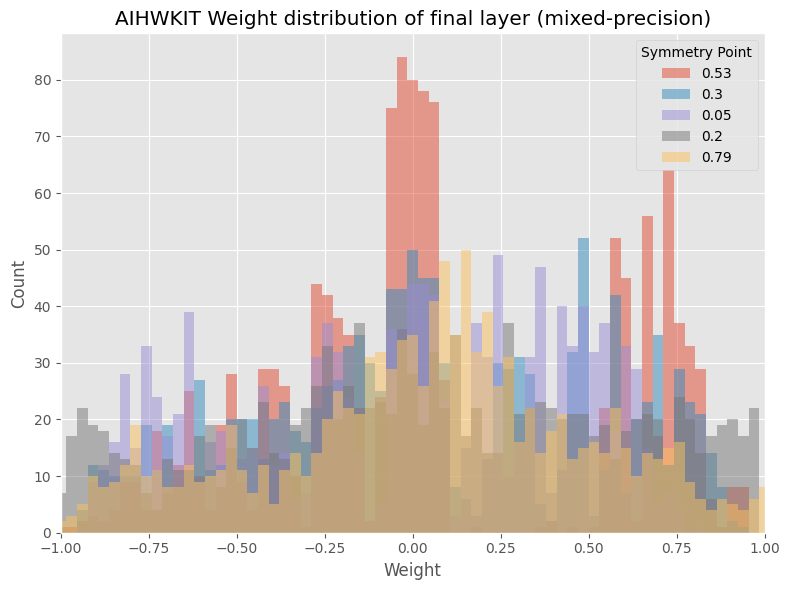

In [11]:
import pickle
import msc_project.utils.data_utils as du
import msc_project.utils.plot_utils as pu
import torch
summary_files = du.get_summary_files(PATH_TEST52)
weights_files = du.get_files(PATH_TEST52, 'pkl', 'weights', 'analog')
summaries = [du.read_summary_file(f)[0] for f in summary_files]
weights = [pickle.load(open(f, 'rb')) for f in weights_files]
# first layer is split into two (256,392) layers, so combine them into one (256,784)
for w in weights:
    for w_i in w:
        t1 = w_i['0.analog_module.array.0.0'][0]
        t2 = w_i['0.analog_module.array.1.0'][0]
        t3 = torch.cat([t1, t2], dim=1)
        new_weight = (t3, None)
        w_i.pop('0.analog_module.array.0.0', None)
        w_i.pop('0.analog_module.array.1.0', None)
        w_i['0.analog_module'] = new_weight
        w_i.move_to_end('0.analog_module', last=False)

df = pd.read_csv(PATH_TEST52+'/test52.csv').sort_values(by=['device_id', 'test_time'])
labels = [df[df['test_time'] == s['test_time']]['symmetry_point'].iloc[0] for s in summaries]

fig, ax = plt.subplots(figsize=(8, 6))

for summary, weight, label in zip(summaries, weights, labels):
    # if summary['device_id'] == "ID161ZR15000" and label in [0.72, 0.56, 0.15]:
    if summary['device_id'] == "ID301XR1000Oct" and label in [0.79, 0.53, 0.3, 0.05, 0.2]:
        pu._plot_weight_hist(ax, weight[-1], layers=(False, False, True), label=label)

ax.set(title="AIHWKIT Weight distribution of final layer (mixed-precision)", xlabel="Weight", ylabel="Count", xlim=(-1, 1))
ax.legend(title="Symmetry Point")

plt.tight_layout()
# plt.savefig(FIGURES_PATH + 'aihwkit_spmp_weight_distribution.png')
plt.show()

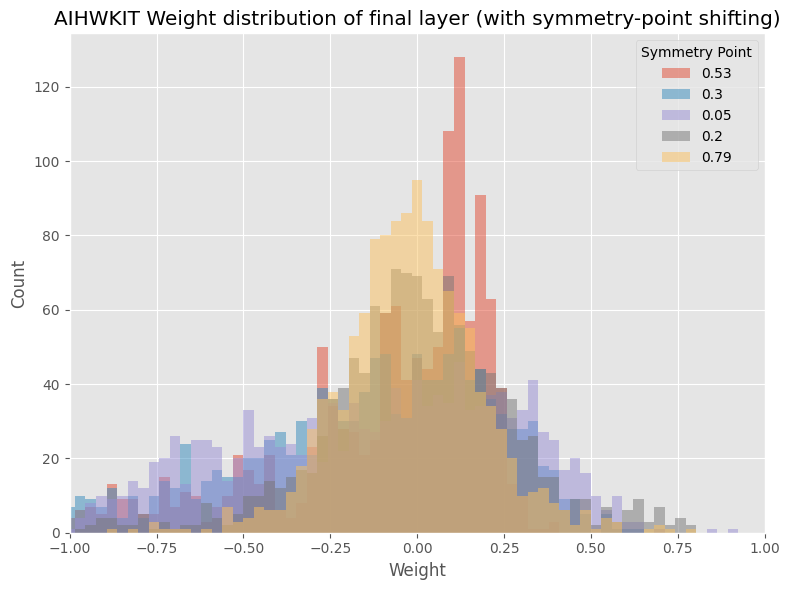

In [12]:
import pickle
import msc_project.utils.data_utils as du
import msc_project.utils.plot_utils as pu
import torch
summary_files = du.get_summary_files(PATH_TEST56)
weights_files = du.get_files(PATH_TEST56, 'pkl', 'weights', 'analog')
summaries = [du.read_summary_file(f)[0] for f in summary_files]
weights = [pickle.load(open(f, 'rb')) for f in weights_files]
# first layer is split into two (256,392) layers, so combine them into one (256,784)
for w in weights:
    for w_i in w:
        t1 = w_i['0.analog_module.array.0.0'][0]
        t2 = w_i['0.analog_module.array.1.0'][0]
        t3 = torch.cat([t1, t2], dim=1)
        new_weight = (t3, None)
        w_i.pop('0.analog_module.array.0.0', None)
        w_i.pop('0.analog_module.array.1.0', None)
        w_i['0.analog_module'] = new_weight
        w_i.move_to_end('0.analog_module', last=False)

df = pd.read_csv(PATH_TEST50+'/test50.csv').sort_values(by=['device_id', 'test_time'])
labels = [df[df['test_time'] == s['test_time']]['symmetry_point'].iloc[0] for s in summaries]

fig, ax = plt.subplots(figsize=(8, 6))

for summary, weight, label in zip(summaries, weights, labels):
    # if summary['device_id'] == "ID161ZR15000" and label in [0.72, 0.56, 0.15]:
    if summary['device_id'] == "ID301XR1000Oct" and label in [0.79, 0.53, 0.3, 0.05, 0.2]:
        pu._plot_weight_hist(ax, weight[-1], layers=(False, False, True), label=label)

ax.set(title="AIHWKIT Weight distribution of final layer (with symmetry-point shifting)",
       xlabel="Weight", ylabel="Count", xlim=(-1, 1))
ax.legend(title="Symmetry Point")

plt.tight_layout()
# plt.savefig(FIGURES_PATH + 'aihwkit_spshift_weight_distribution.png')
plt.show()

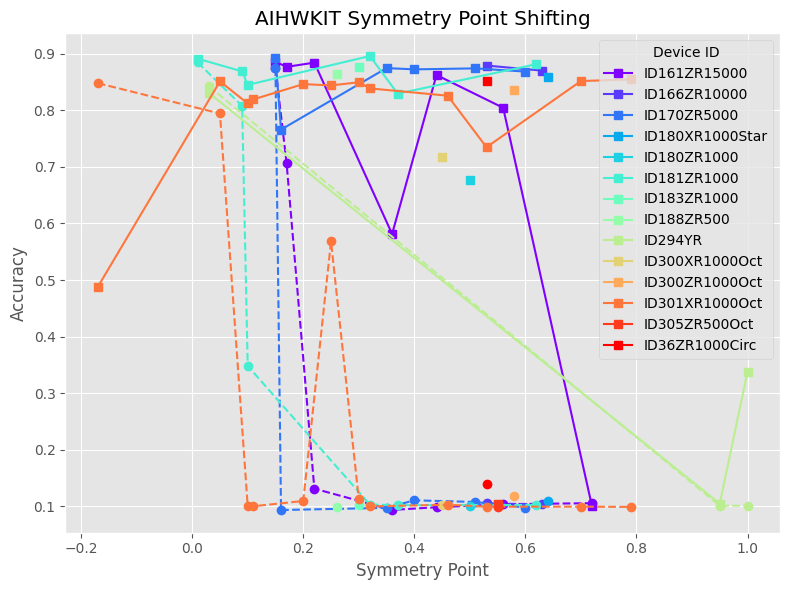

In [13]:
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))

df_plainsgd = pd.read_csv(PATH_TEST50 + '/test50.csv').sort_values(by=['device_id', 'symmetry_point', 'test_time'])
df_spshift = pd.read_csv(PATH_TEST56 + '/test56.csv').sort_values(
    by=['device_id', 'test_time']).sort_values(by=['device_id', 'symmetry_point', 'test_time'])

device_ids_filter = ['ID301XR1000Oct', 'ID161ZR15000', 'ID170ZR5000', 'ID181ZR1000']
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_plainsgd['device_id'].unique())))

for device_id, color in zip(df_plainsgd['device_id'].unique(), colors):
    # if device_id not in device_ids_filter:
    # continue
    df_device = df_plainsgd[df_plainsgd['device_id'] == device_id]
    ax.plot(df_device['symmetry_point'], df_device['val_acc'], ls='--', marker='o', color=color)
    df_device = df_spshift[df_spshift['device_id'] == device_id]
    ax.plot(df_device['symmetry_point'], df_device['val_acc'], label=device_id, marker='s', color=color)

# ax.plot(df_plainsgd['symmetry_point'], df_plainsgd['val_acc'], label='Plain SGD', marker='o')
# ax.plot(df_spshift['symmetry_point'], df_spshift['val_acc'], label='Symmetry-point shifting', marker='o')

ax.legend(title="Device ID")
ax.set(xlabel="Symmetry Point", ylabel="Accuracy", title="AIHWKIT Symmetry Point Shifting")

plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_spshift_accuracy.png')
plt.show()

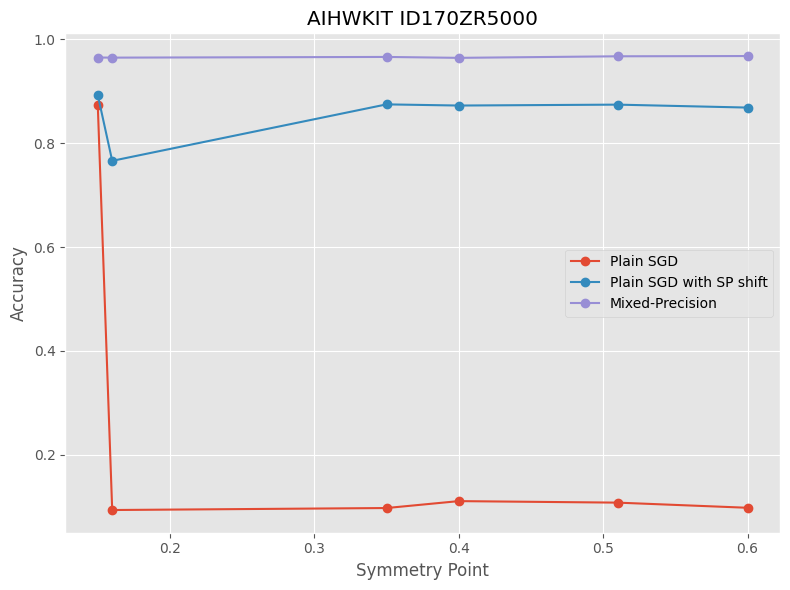

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

df_plainsgd = pd.read_csv(PATH_TEST50 + '/test50.csv').sort_values(by=['device_id', 'symmetry_point', 'test_time'])
df_spshift = pd.read_csv(PATH_TEST56 + '/test56.csv').sort_values(
    by=['device_id', 'test_time']).sort_values(by=['device_id', 'symmetry_point', 'test_time'])
df_mp = pd.read_csv(PATH_TEST52 + '/test52.csv').sort_values(
    by=['device_id', 'test_time']).sort_values(by=['device_id', 'symmetry_point', 'test_time'])

df_plainsgd = df_plainsgd[df_plainsgd['device_id'] == 'ID170ZR5000']
df_spshift = df_spshift[df_spshift['device_id'] == 'ID170ZR5000']
df_mp = df_mp[df_mp['device_id'] == 'ID170ZR5000']

ax.plot(df_plainsgd['symmetry_point'], df_plainsgd['val_acc'], label='Plain SGD', marker='o')
ax.plot(df_spshift['symmetry_point'], df_spshift['val_acc'], label='Plain SGD with SP shift', marker='o')
ax.plot(df_mp['symmetry_point'], df_mp['val_acc'], label='Mixed-Precision', marker='o')

# ax.plot(df_plainsgd['symmetry_point'], df_plainsgd['val_acc'], label='Plain SGD', marker='o')
# ax.plot(df_spshift['symmetry_point'], df_spshift['val_acc'], label='Symmetry-point shifting', marker='o')

ax.legend()
ax.set(xlabel="Symmetry Point", ylabel="Accuracy", title="AIHWKIT ID170ZR5000")

plt.tight_layout()
# plt.savefig(FIGURES_PATH + 'aihwkit_ID170ZR5000_sp.png')
plt.show()

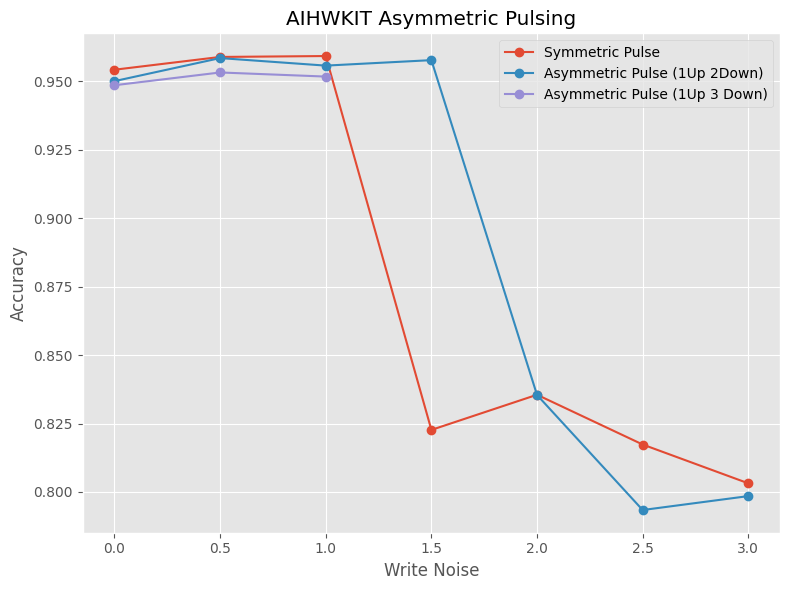

In [26]:
up1down0 = pd.read_csv(PATH_TEST57 + '1up0down.csv').sort_values(by=['write_noise_std'])
up1down2 = pd.read_csv(PATH_TEST57 + '1up2down.csv').sort_values(by=['write_noise_std'])
up1down3 = pd.read_csv(PATH_TEST57 + '1up3down.csv').sort_values(by=['write_noise_std'])


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(up1down0['write_noise_std'], up1down0['val_acc'], label="Symmetric Pulse", marker='o')
ax.plot(up1down2['write_noise_std'], up1down2['val_acc'], label="Asymmetric Pulse (1Up 2Down)", marker='o')
ax.plot(up1down3['write_noise_std'], up1down3['val_acc'], label="Asymmetric Pulse (1Up 3 Down)", marker='o')
ax.set(xlabel='Write Noise', ylabel='Accuracy', title='AIHWKIT Asymmetric Pulsing')
ax.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_asymmetric_pulsing_noise.png')
plt.show()

In [16]:
# plt.style.use('default')
# plt.rc('font', size=20)
# fig, ax = plt.subplots(figsize=(7, 5))
# args = Args()
# args.input = PATH_TEST46 + 'symmetric/aihwkit'
# args.x = 'energy'
# args.y = 'val_acc'
# args.hue = 'pulseWidth'
# args.huescale = 'log'
# args.scale = 'lin-log'
# args.huelabel = "$t_{{write}}$"
# args.filter = [["device_id", "ID170ZR5000"]]
# args.title=''
# args.ylabel='Accuracy (%)'
# args.xlabel='Energy (J)'
# ax.grid(True)
# pu._plot_pytorch(fig, ax, args)
# ax.set(xlabel=args.xlabel, ylabel=args.ylabel, xscale='log')
# plt.show()

In [17]:
# metrics_files = du.get_metrics_csv_files(PATH_TEST46 + 'symmetric/aihwkit')
# metrics = [pd.read_csv(f) for f in metrics_files]

# summary_files = du.get_summary_files(PATH_TEST46 + 'symmetric/aihwkit')
# summaries = [du.read_summary_file(s) for s in summary_files]

# shapes_sizes = pd.read_csv('/scratch/msc24h18/msc_project/data/LBE247_shapes_and_sizes.csv', usecols=['device_id', 'shape', 'size'], index_col='device_id').to_dict(orient='index')
# du.add_energy_to_metrics(metrics, summaries, shapes_sizes)

# summaries = [s[0] for s in summaries]
# summaries = {key: [d[key] for d in summaries] for key in summaries[0].keys()}

# rpu_config_files = du.get_rpu_txt_files(args.input)
# rpu_configs = [du.read_rpu_txt(rpu) for rpu in rpu_config_files]
# rpu_configs = {key: np.array([d[key] for d in rpu_configs]) for key in rpu_configs[0]}

# metadata = {**summaries, **rpu_configs}
# metadata = pd.DataFrame(metadata)
# metadata = metadata.apply(pd.to_numeric, errors='ignore')
# metadata = pu.filter_data(metadata, [['device_id', 'ID170ZR5000']], [], reset_index=False)
# metadata = metadata.sort_values(by=['device_id', 'test_time'])


# with open(f"device_ID170ZR5000_accuracy_vs_epoch.txt", 'w') as f:
#     for i in metadata.index:
#         metric = metrics[i]
#         md = metadata.loc[i]
#         f.write(f"# Pulse Width: {md['pulseWidth']}\n")
#         f.write(metric[['pulses', 'val_acc', 'energy']].to_string(index=False) + "\n\n")

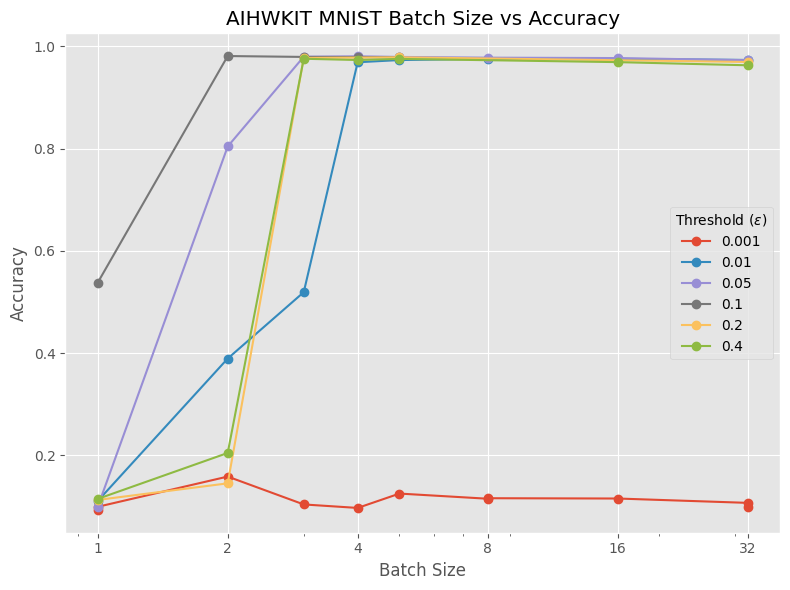

In [18]:
df = pd.read_csv(PATH_TEST59 + '/test59.csv').sort_values(by=['batch_size', 'threshold'])

fig, ax = plt.subplots(figsize=(8, 6))

df = df[(df['batch_size'] != 64) & (df['threshold'] < 0.5) & (df['threshold'] != 0.005)]
for threshold in sorted(df['threshold'].unique()):
    df_threshold = df[(df['threshold'] == threshold)]
    ax.plot(df_threshold['batch_size'], df_threshold['val_acc'], label=f"{threshold}", marker='o')

ax.set(xlabel='Batch Size', ylabel='Accuracy', title='AIHWKIT MNIST Batch Size vs Accuracy', xscale='log')
ax.set_xticks([1, 2, 4, 8, 16, 32])
ax.set_xticklabels([1, 2, 4, 8, 16, 32])
ax.legend(title="Threshold ($\\varepsilon$)")

plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_batch_size_vs_accuracy.png')
plt.show()

# fig, ax = plt.subplots(figsize=(8, 6))

# for batch_size in sorted(df['batch_size'].unique()):
#     df_batch = df[(df['batch_size'] == batch_size)]
#     ax.plot(df_batch['threshold'], df_batch['val_acc'], label=f"{batch_size}", marker='o')

# ax.set(xlabel='Batch Size', ylabel='Accuracy', title='AIHWKIT MNIST Threshold vs Accuracy', xscale='log')
# # ax.set_xticks([1, 2, 4, 8, 16, 32])
# # ax.set_xticklabels([1, 2, 4, 8, 16, 32])
# ax.legend(title="Batch Size")

# plt.tight_layout()
# # plt.savefig(FIGURES_PATH + 'aihwkit_batch_size_vs_accuracy.png')
# plt.show()

In [ ]:
# args = Args()
# # args.input = PATH_TEST50 + 'aihwkit'
# args.input = PATH_TEST52 + '/aihwkit'
# args.x = 'epoch'
# args.y = 'val_acc'
# args.hue = 'device_id'
# args.huescale = 'linear'
# args.huelabel = "Device ID"

# fig, ax = plt.subplots(figsize=(8, 6))
# pu._plot_pytorch(fig, ax, args)

# # ax.set(title="Plain SGD", xlabel="Epoch", ylabel="Accuracy")
# ax.set(title="Mixed-Precision SGD", xlabel="Epoch")

# plt.tight_layout()
# plt.show()

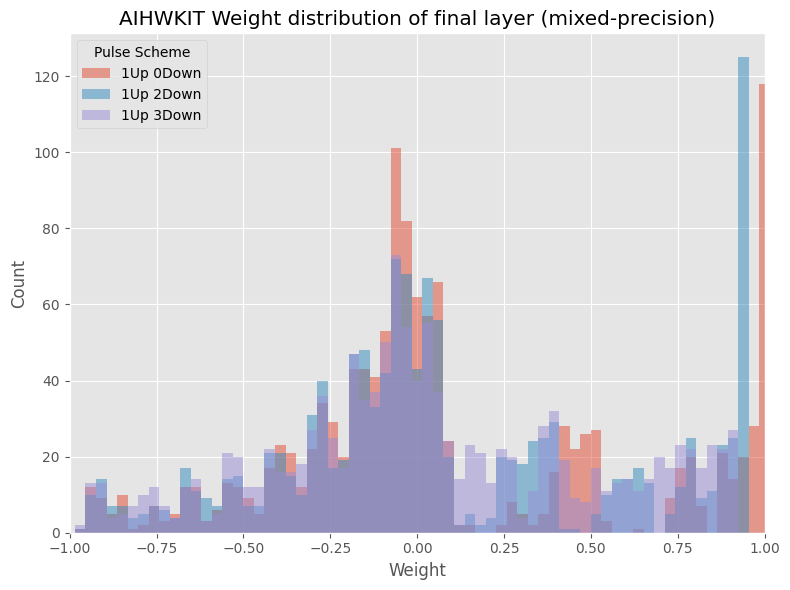

In [ ]:
import pickle
import msc_project.utils.data_utils as du
import msc_project.utils.plot_utils as pu
import torch
summary_files = du.get_summary_files(PATH_TEST57)
asymmetric_down_list = []
for f in summary_files:
    if "1up2down" in f:
        asymmetric_down_list.append(2)
    elif "1up0down" in f:
        asymmetric_down_list.append(0)
    elif "1up3down" in f:
        asymmetric_down_list.append(3)

weights_files = du.get_files(PATH_TEST57, 'pkl', 'weights', 'analog')
summaries = [du.read_summary_file(f)[0] for f in summary_files]
weights = [pickle.load(open(f, 'rb')) for f in weights_files]
# first layer is split into two (256,392) layers, so combine them into one (256,784)
for w in weights:
    for w_i in w:
        t1 = w_i['0.analog_module.array.0.0'][0]
        t2 = w_i['0.analog_module.array.1.0'][0]
        t3 = torch.cat([t1, t2], dim=1)
        new_weight = (t3, None)
        w_i.pop('0.analog_module.array.0.0', None)
        w_i.pop('0.analog_module.array.1.0', None)
        w_i['0.analog_module'] = new_weight
        w_i.move_to_end('0.analog_module', last=False)


# summaries = {key: [d[key] for d in summaries] for key in summaries[0].keys()}

rpu_config_files = du.get_rpu_txt_files(PATH_TEST57)
rpu_configs = [du.read_rpu_txt(rpu) for rpu in rpu_config_files]
# rpu_configs = {key: np.array([d[key] for d in rpu_configs]) for key in rpu_configs[0]}

# metadata = {**summaries, **rpu_configs}
# metadata = pd.DataFrame(metadata)

df = pd.read_csv(PATH_TEST57+'/test57.csv').sort_values(by=['device_id', 'test_time', 'asymmetric_down'])
labels = [[asd, r['write_noise_std']] for asd, r in zip(asymmetric_down_list, rpu_configs)]
fig, ax = plt.subplots(figsize=(8, 6))

for summary, weight, label in zip(summaries, weights, labels):
    # if summary['device_id'] == "ID161ZR15000" and label in [0.72, 0.56, 0.15]:
    if summary['device_id'] == "ID294YR" and label[1] == 0:
        pu._plot_weight_hist(ax, weight[-1], layers=(False, False, True), label=f"1Up {label[0]}Down")

ax.set(title="AIHWKIT Weight distribution of final layer (mixed-precision)", xlabel="Weight", ylabel="Count", xlim=(-1, 1))
ax.legend(title="Pulse Scheme")

plt.tight_layout()
plt.show()

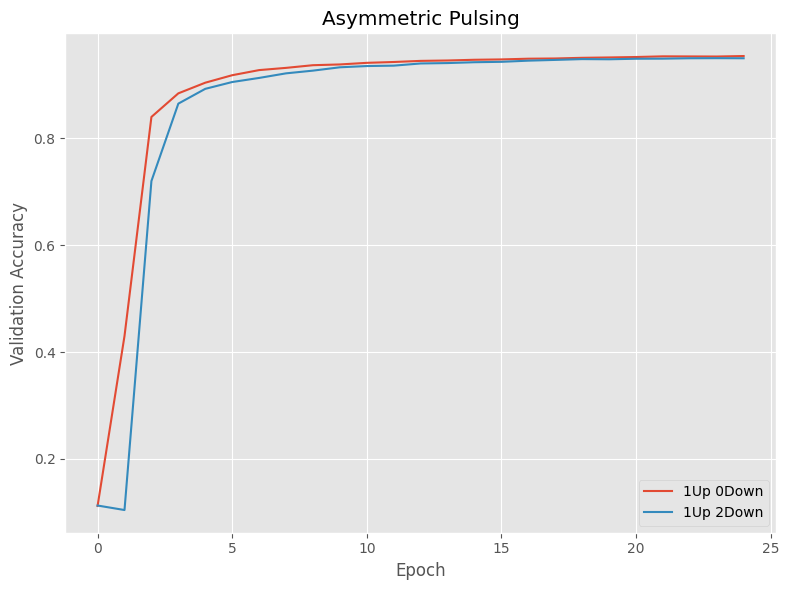

In [21]:
data_1u0d = pd.read_csv(
    PATH_TEST57+'1up0down/write_noise_std_0/aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(3)]20240919111350/metrics.csv')
data_1u2d = pd.read_csv(
    PATH_TEST57 + '1up2down/write_noise_std_0/aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(3)]20240919111350/metrics.csv')


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data_1u0d['epoch'], data_1u0d['val_acc'], label="1Up 0Down")
ax.plot(data_1u2d['epoch'], data_1u2d['val_acc'], label="1Up 2Down")
ax.set(xlabel='Epoch', ylabel='Validation Accuracy', title='Asymmetric Pulsing')
ax.legend()
plt.tight_layout()
plt.show()